In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle

In [4]:
df_grad= pd.read_csv("/Users/nicolerodriguez/gwcla/data/Graduation_results_for_Cohorts_2001_to_2011__Classes_of_2005_to_2015__20241007.csv")

/var/folders/fr/r5h17zrs40z1ykh6yttmmpd00000gn/T/ipykernel_32586/1184582186.py:1: DtypeWarning: Columns (25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_grad= pd.read_csv("/Users/nicolerodriguez/gwcla/data/Graduation_results_for_Cohorts_2001_to_2011__Classes_of_2005_to_2015__20241007.csv")


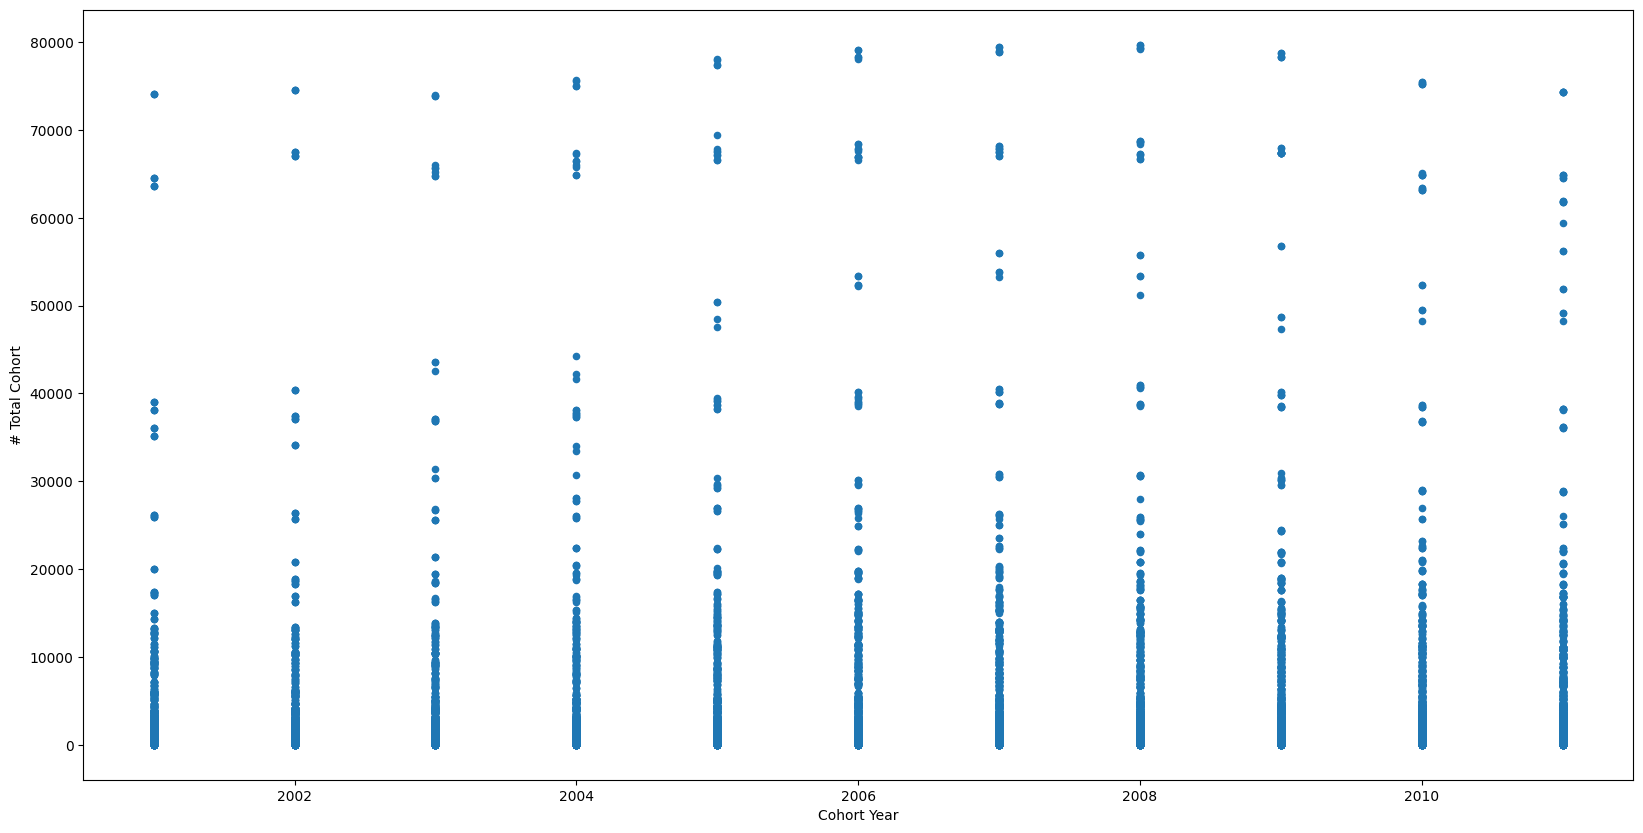

In [5]:
df_grad.plot(kind='scatter', x = 'Cohort Year', y = '# Total Cohort', figsize = (20, 10))
plt.show()
#only chart that can be made before converting rest to int or float

In [6]:
def map_borough(code):
    #creating boro column
    if code == 'Citywide':
        return 'Citywide'
    elif 'X' in code:
        return 'Bronx'  
    elif 'K' in code:
        return 'Brooklyn'  
    elif 'M' in code:
        return 'Manhattan'  
    elif 'Q' in code:
        return 'Queens'  
    elif 'S' in code:
        return 'Staten Island' 
    
    if len(code) >= 3:
        if code[-3] == 'K':
            return 'Brooklyn'
        elif code[-3] == 'X':
            return 'Bronx'
        elif code[-3] == 'M':
            return 'Manhattan'
        elif code[-3] == 'Q':
            return 'Queens'
        elif code[-3] == 'S':
            return 'Staten Island'
    
    return 'Other'


df_grad['Borough'] = df_grad['Geographic Subdivision'].apply(map_borough)

print(df_grad[['Geographic Subdivision', 'School Name', 'Borough']])

       Geographic Subdivision                     School Name   Borough
0                    Citywide                             NaN  Citywide
1                    Citywide                             NaN  Citywide
2                    Citywide                             NaN  Citywide
3                    Citywide                             NaN  Citywide
4                    Citywide                             NaN  Citywide
...                       ...                             ...       ...
278910                 32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Brooklyn
278911                 32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Brooklyn
278912                 32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Brooklyn
278913                 32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Brooklyn
278914                 32K564  BUSHWICK COMMUNITY HIGH SCHOOL  Brooklyn

[278915 rows x 3 columns]


In [7]:
df_grad.drop(columns=['% SACC (IEP Diploma) of Cohort','# TASC (GED)', '% TASC (GED) of Cohort', 'School Name', '# SACC (IEP Diploma)'], inplace=True)

In [8]:
df_grad.dropna(inplace=True)

In [9]:
columns_to_convert = [
    '# Grads', 
    '% Grads', 
    '# Total Regents', 
    '% Total Regents of Cohort', 
    '% Total Regents of Grads', 
    '# Advanced Regents', 
    '% Advanced Regents of Cohort', 
    '% Advanced Regents of Grads', 
    '# Regents without Advanced', 
    '% Regents without Advanced of Cohort', 
    '% Regents without Advanced of Grads', 
    '# Local', 
    '% Local of Cohort', 
    '% Local of Grads', 
    '# Still Enrolled', 
    '% Still Enrolled', 
    '# Dropout', 
    '% Dropout',  
]

for column in columns_to_convert:
    df_grad[column] = pd.to_numeric(df_grad[column], errors='coerce')

print(df_grad.dtypes)


Report Category                          object
Geographic Subdivision                   object
Category                                 object
Cohort Year                               int64
Cohort                                   object
# Total Cohort                            int64
# Grads                                 float64
% Grads                                 float64
# Total Regents                         float64
% Total Regents of Cohort               float64
% Total Regents of Grads                float64
# Advanced Regents                      float64
% Advanced Regents of Cohort            float64
% Advanced Regents of Grads             float64
# Regents without Advanced              float64
% Regents without Advanced of Cohort    float64
% Regents without Advanced of Grads     float64
# Local                                 float64
% Local of Cohort                       float64
% Local of Grads                        float64
# Still Enrolled                        

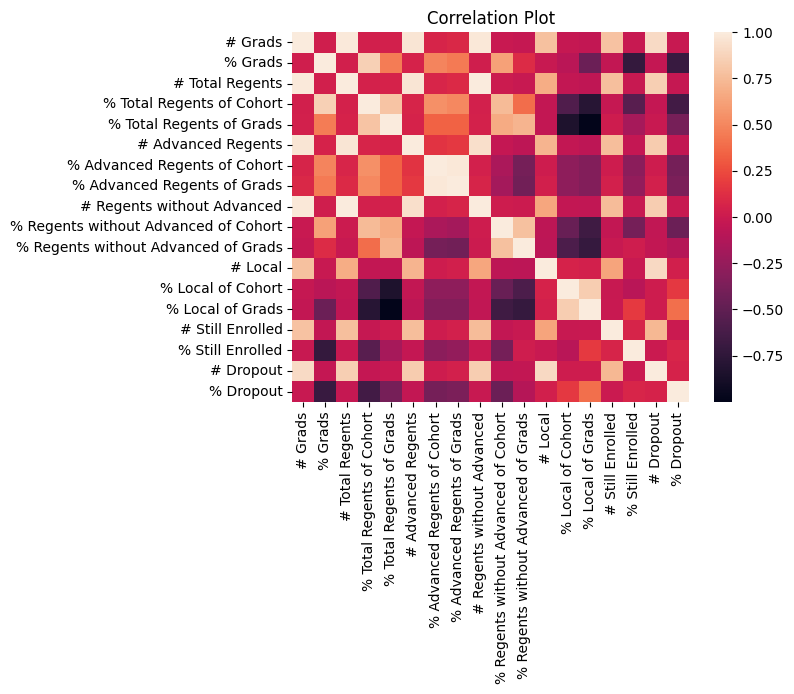

In [10]:
corr_matrix = df_grad[columns_to_convert].corr()
sns.heatmap(corr_matrix)
plt.title('Correlation Plot')
plt.show()

In [11]:
corr_matrix

,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,% Total Regents of Grads,# Advanced Regents,% Advanced Regents of Cohort,% Advanced Regents of Grads,# Regents without Advanced,% Regents without Advanced of Cohort,% Regents without Advanced of Grads,# Local,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout
# Grads,1.000000,0.026072,0.988447,0.033714,0.039413,0.967367,0.065084,0.089762,0.977210,-0.012089,-0.029020,0.780216,-0.024077,-0.039300,0.784021,-0.020660,0.907135,-0.015873
% Grads,0.026072,1.000000,0.034896,0.857797,0.445878,0.055773,0.490497,0.439175,0.025259,0.621254,0.103040,-0.017259,-0.083768,-0.446015,-0.046216,-0.721030,-0.033815,-0.695761
# Total Regents,0.988447,0.034896,1.000000,0.050443,0.057602,0.966281,0.073412,0.096904,0.993927,0.001012,-0.016753,0.676400,-0.042616,-0.057511,0.769497,-0.021925,0.850419,-0.026529
% Total Regents of Cohort,0.033714,0.857797,0.050443,1.000000,0.794784,0.069338,0.546271,0.506444,0.041335,0.744594,0.390518,-0.044237,-0.583991,-0.794427,-0.026630,-0.540874,-0.031935,-0.653174
% Total Regents of Grads,0.039413,0.445878,0.057602,0.794784,1.000000,0.062529,0.340954,0.343335,0.054317,0.666077,0.711283,-0.046092,-0.836770,-0.999602,0.010565,-0.177396,-0.013409,-0.393211
# Advanced Regents,0.967367,0.055773,0.966281,0.069338,0.062529,1.000000,0.141821,0.166360,0.932079,-0.031212,-0.063962,0.713117,-0.046245,-0.062410,0.760056,-0.033247,0.832857,-0.044804
% Advanced Regents of Cohort,0.065084,0.490497,0.073412,0.546271,0.340954,0.141821,1.000000,0.978176,0.042674,-0.152366,-0.401943,0.013399,-0.284311,-0.340686,0.014631,-0.297706,0.013623,-0.401709
% Advanced Regents of Grads,0.089762,0.439175,0.096904,0.506444,0.343335,0.166360,0.978176,1.000000,0.065237,-0.181969,-0.415969,0.036368,-0.288122,-0.343038,0.044294,-0.260814,0.040112,-0.367157
# Regents without Advanced,0.977210,0.025259,0.993927,0.041335,0.054317,0.932079,0.042674,0.065237,1.000000,0.014763,0.003766,0.646854,-0.040192,-0.054240,0.757771,-0.016638,0.840505,-0.018176
% Regents without Advanced of Cohort,-0.012089,0.621254,0.001012,0.744594,0.666077,-0.031212,-0.152366,-0.181969,0.014763,1.000000,0.781106,-0.062874,-0.462492,-0.665868,-0.043081,-0.400943,-0.048537,-0.450575


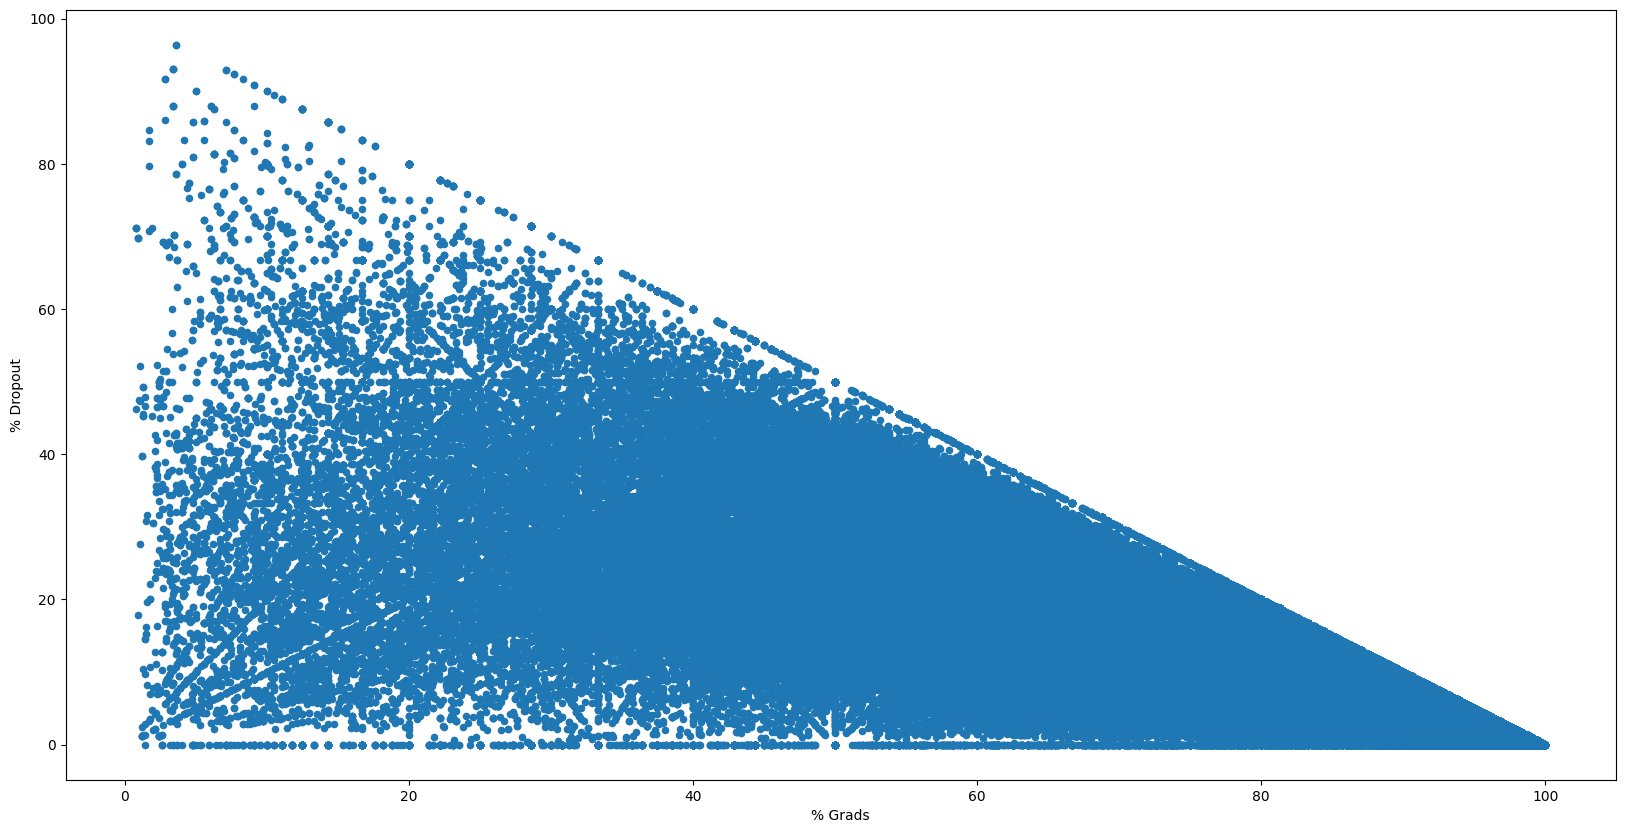

In [12]:
df_grad.plot(kind='scatter', x = '% Grads', y = '% Dropout' , figsize = (20, 10))
plt.show()

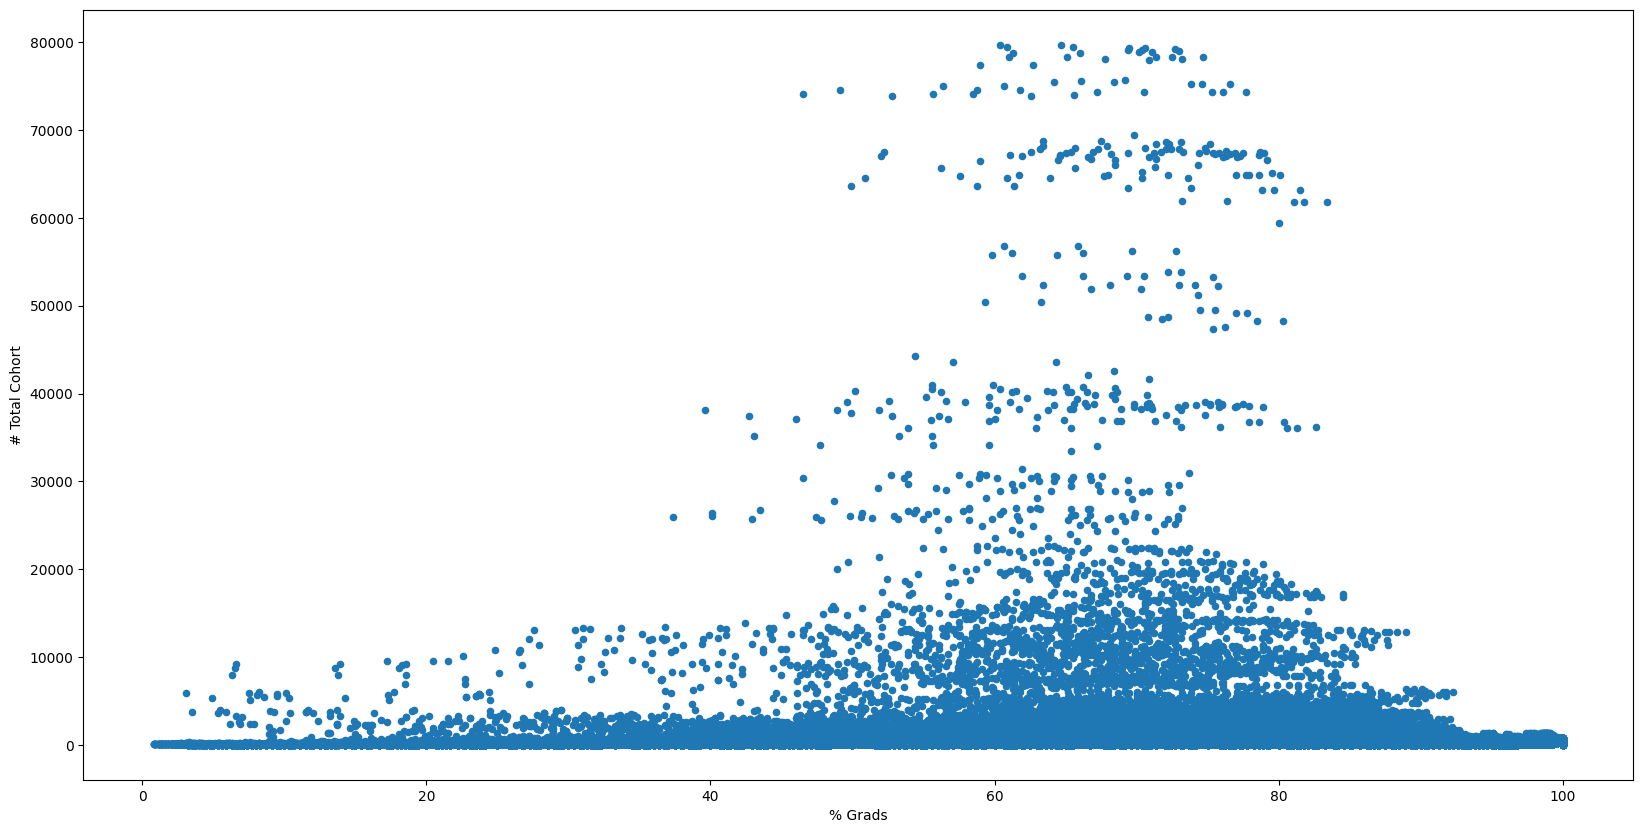

In [13]:
df_grad.plot(kind='scatter', x = '% Grads', y = '# Total Cohort' , figsize = (20, 10))
plt.show()

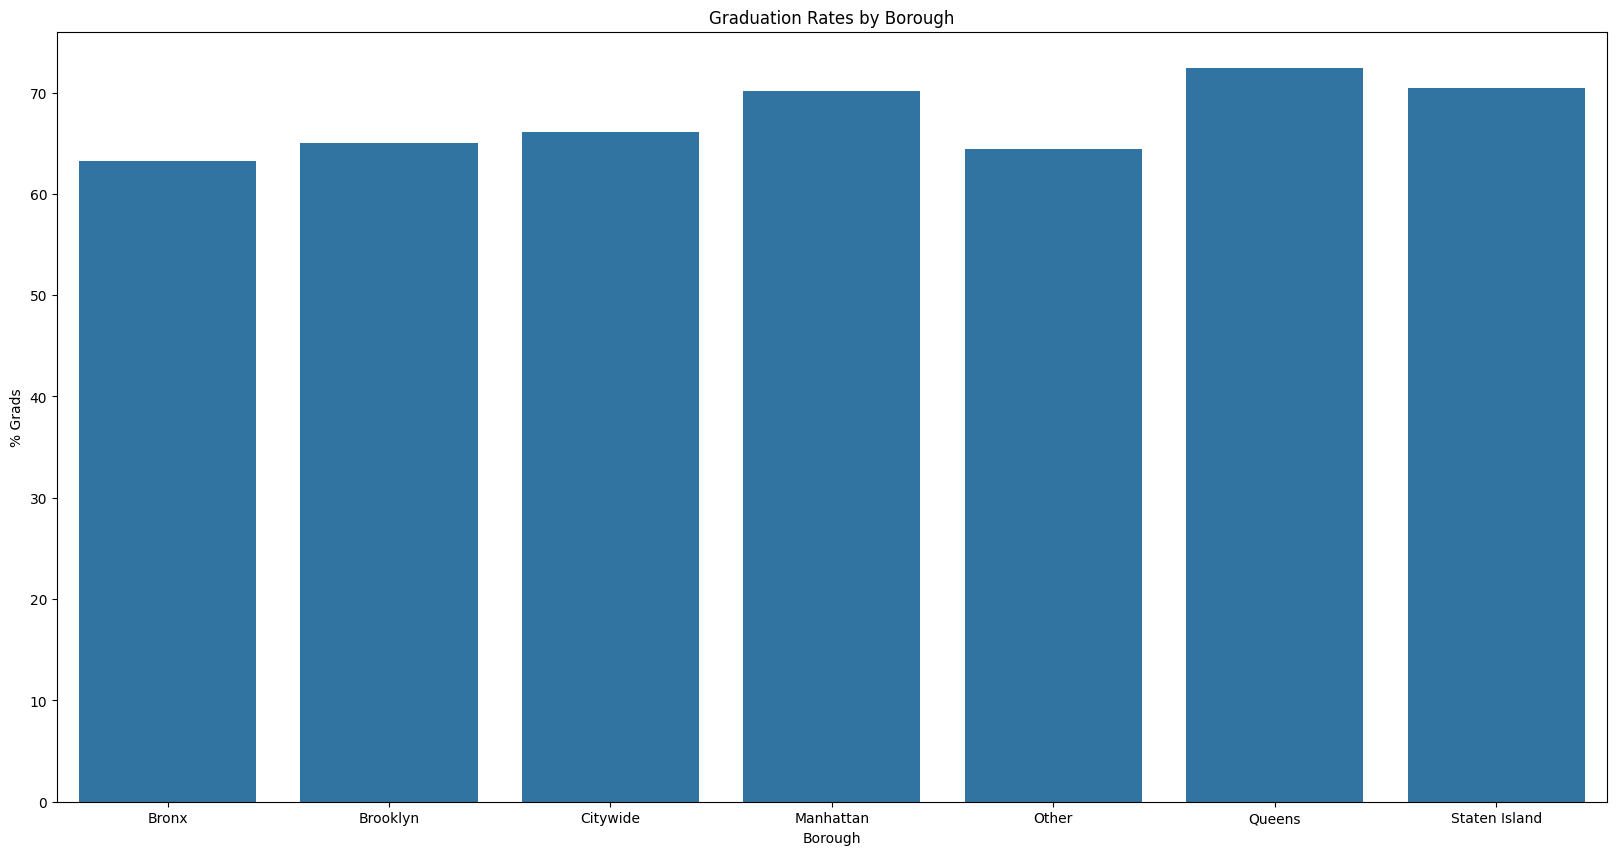

In [14]:
graduation_rates = df_grad.groupby('Borough')['% Grads'].mean().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(data=graduation_rates, x='Borough', y='% Grads')
plt.title('Graduation Rates by Borough')
plt.xlabel('Borough')
plt.ylabel('% Grads')
plt.show()